## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 2.8MB/s 


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [3]:
# Função Objetivo Auxiliar -> Repare que o único parametro que a função deve receber é um individuo
def ReceitaClientes(individual):
  xA = individual[0]
  yA = individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = individual[6]
  alcanceB = individual[7]
  alcanceC = individual[8]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  localizacaoCidades = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  for localizacaoCidade in localizacaoCidades:
    if((math.sqrt(((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  i = 0
  clientesPorCidade = [7571, 5274, 11082, 11879, 9226, 7942, 6295, 4286, 8132, 11344]
  adesaoPercentualClientes = [0.63, 0.61, 0.73, 0.74, 0.68, 0.53, 0.44, 0.20, 0.12, 0.73]
  precoMedioPorCliente = [85.17, 113.55, 69.09, 67.03, 75.65, 82.58, 97.37, 141.28, 81.37, 68.37]
  receitaPorCidade = [(a*b*c*d) for a, b, c, d in zip(clientesPorCidade, cidadesAtendidas, adesaoPercentualClientes, precoMedioPorCliente)]
  receitaTotal = sum(receitaPorCidade)
  return receitaTotal

In [4]:
# Função Objetivo Auxiliar -> Repare que o único parametro que a função deve receber é um individuo
def DespesaInstalacao(raio):
  if( raio> 30 ):
    return 180000
  if( raio> 15 and raio<=30):
    return 115000
  if( raio>=5 and raio<=15):
    return 68000
  return 27000

def DespesaAntenas(individual):
  alcanceA = individual[6]
  alcanceB = individual[7]
  alcanceC = individual[8]
  custoVariavel = (alcanceA+alcanceB+alcanceC)*970
  custoFixo = DespesaInstalacao(alcanceA) + DespesaInstalacao(alcanceB) + DespesaInstalacao(alcanceC)
  custo_total = custoFixo + custoVariavel
  return custo_total

In [5]:
# Função Objetivo Total-> Repare que o único parametro que a função deve receber é um individuo
def LucroTotal(individual):
  receita = ReceitaClientes(individual)
  custo = DespesaAntenas(individual)
  lucro = receita - custo
  return lucro,

In [7]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  xA = individual[0]
  yA = individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = individual[6]
  alcanceB = individual[7]
  alcanceC = individual[8]
  localizacaoAntenasFisica = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  for localizacaoAntena in localizacaoAntenasFisica:
    if((math.sqrt(((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  if ((sum(cidadesAtendidasAntenaA)>=3) and (sum(cidadesAtendidasAntenaB)>=3) and (sum(cidadesAtendidasAntenaC)>=3)):
    return True
  return False

In [9]:
# Função para cálculo da penalização da função objetivo para os casos em que o individuo não satisfaça as restrições
def distance(individual):
  constraintA = 0
  constraintB = 0
  constraintC = 0
  xA = individual[0]
  yA = individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = individual[6]
  alcanceB = individual[7]
  alcanceC = individual[8]
  localizacaoAntenasFisica = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  for localizacaoAntena in localizacaoAntenasFisica:
    dist = (((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2) + alcanceA)
    if((math.sqrt(((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2)) > alcanceA)):
      constraintA = constraintA + dist
    dist = (((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2) + alcanceB)
    if((math.sqrt(((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2)) > alcanceB)):
      constraintB = constraintB + dist
    dist = (((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2) + alcanceC)
    if((math.sqrt(((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2)) > alcanceC)):
      constraintC = constraintC + dist

  return (constraintA**2 + constraintB**2 + constraintC**2)**2

In [10]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  for _ in range(10):
    v1 = attr_bool_function()
    v2 = attr_bool_function()
    v3 = attr_bool_function()
    v4 = attr_bool_function()
    v5 = attr_bool_function()
    v6 = attr_bool_function()
    v7 = attr_bool_function()
    v8 = attr_bool_function()
    v9 = attr_bool_function()
    if FuncaoDeRestricao([v1, v2, v3, v4, v5, v6, v7, v8, v9]):
      break
    i = i + 1
  cromossomo.append(v1)
  cromossomo.append(v2)
  cromossomo.append(v3)
  cromossomo.append(v4)
  cromossomo.append(v5)
  cromossomo.append(v6)
  cromossomo.append(v7)
  cromossomo.append(v8)
  cromossomo.append(v9)
  return icls(cromossomo)

In [11]:
# Função própria de cruzamento 
def CrossoverFunction(ind1, ind2, icls, attr_bool_function):
  new_ind1, new_ind2 = tools.cxTwoPoint(ind1, ind2)
  if(not(FuncaoDeRestricao(new_ind1))):
    new_ind1,trash = tools.cxOnePoint(ind1, ind2)
    if(not(FuncaoDeRestricao(new_ind1))):
      new_ind1,trash = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(FuncaoDeRestricao(new_ind1))):
        tries = 0
        while(not(FuncaoDeRestricao(new_ind1))):
          if tries >= 20:
            new_ind1 = ind1
            break
          new_ind1 = GeradorDeIndividuos(icls, attr_bool_function)
          tries = tries + 1
  if(not(FuncaoDeRestricao(new_ind2))):
    trash,new_ind1 = tools.cxOnePoint(ind1, ind2)
    if(not(FuncaoDeRestricao(new_ind2))):
      trash,new_ind2 = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(FuncaoDeRestricao(new_ind2))):
        tries = 0
        while(not(FuncaoDeRestricao(new_ind2))):
          if tries >= 20:
            new_ind2 = ind2
            break
          new_ind2 = GeradorDeIndividuos(icls, attr_bool_function)
          tries = tries + 1
  return new_ind1,new_ind2

In [12]:
# Função própria de mutação 
def MutationFunction(ind, indpb):
  new_ind = tools.mutFlipBit(ind, indpb)[0]
  xA = new_ind[0]
  yA = new_ind[1]
  xB = new_ind[2]
  yB = new_ind[3]
  xC = new_ind[4]
  yC = new_ind[5]
  alcanceA = new_ind[6]
  alcanceB = new_ind[7]
  alcanceC = new_ind[8]
  tries = 0
  while not(FuncaoDeRestricao([xA, yA, xB, yB, xC, yC, alcanceA, alcanceB, alcanceC])):
    new_ind = tools.mutFlipBit(ind, indpb)[0]
    xA = new_ind[0]
    yA = new_ind[1]
    xB = new_ind[2]
    yB = new_ind[3]
    xC = new_ind[4]
    yC = new_ind[5]
    alcanceA = new_ind[6]
    alcanceB = new_ind[7]
    alcanceC = new_ind[8]
    if tries >= 20:
      break
    tries = tries + 1
  return new_ind,

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [13]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [14]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.uniform, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
#toolbox.register("individualCreator", GeradorDeIndividuos, toolbox.attr_bool)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 9)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", LucroTotal)
# Registro da função de penalidade caso o individuo não obedeça as restrições
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, distance)) 
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
# toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mate", CrossoverFunction, icls=creator.Individual, attr_bool_function=toolbox.attr_bool)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("mutate", MutationFunction, indpb=0.1)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selRoulette)

## Chamada efetiva do GA para resolução

In [15]:
pop = toolbox.population(n=10)                           # inicialização da pop
hof = tools.HallOfFame(2)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [16]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.7, ngen=15, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg       	std   	min        	max        
0  	10    	2.9883e+06	303612	2.39438e+06	3.28931e+06
1  	9     	-1.18897e+17	1.98848e+17	-5.11202e+17	3.21679e+06
2  	9     	-3.12795e+17	2.1436e+17 	-5.55179e+17	3.21679e+06
3  	9     	-1.63611e+17	2.13087e+17	-5.34211e+17	3.21679e+06
4  	9     	-4.25776e+16	1.27733e+17	-4.25776e+17	3.21679e+06
5  	8     	-1.13635e+17	2.01828e+17	-5.32424e+17	3.21679e+06
6  	9     	-1.76555e+17	2.25104e+17	-5.11615e+17	3.21679e+06
7  	9     	-1.04381e+17	2.09271e+17	-5.5452e+17 	3.21679e+06
8  	7     	-1.02668e+17	2.05338e+17	-5.15755e+17	3.21679e+06
9  	8     	-5.77535e+16	1.7326e+17 	-5.77535e+17	3.21679e+06
10 	9     	-1.90962e+17	2.38218e+17	-5.32439e+17	3.21679e+06
11 	9     	-7.67426e+16	1.53901e+17	-4.08991e+17	3.21679e+06
12 	7     	-7.8413e+16 	1.56829e+17	-3.9411e+17 	3.21679e+06
13 	7     	-7.04562e+16	1.6246e+17 	-5.33069e+17	3.21679e+06
14 	10    	-1.41331e+17	1.86668e+17	-5.33308e+17	3.21679e+06
15 	7     	-3.44026e+16	1.03208e+17	-3.4

## Resultados

In [17]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[1])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[1]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
LucroTotal(hof[1])

Melhor Indivíduo:
[2.994736365829681, 42.05547824722444, 27.834635252343542, 35.04746669810689, 25.65223757781334, 48.56810324449487, 23.111293765319225, 41.835796829566696, 25.56230423843558]
True
Melhor Resultado da Função Objetivo:


(3280492.499311678,)

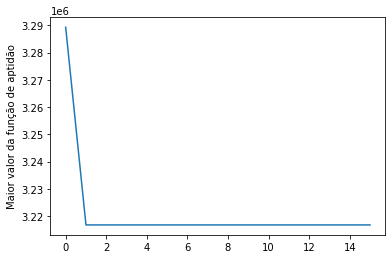

In [18]:
import matplotlib.pyplot as plt
gen, maxVal = log.select("gen", "max")
plt.plot(gen, maxVal)
plt.ylabel('Maior valor da função de aptidão')
plt.show()

In [ ]:
 3372363.3457845994 - 3341857.9277290623

30505.418055537157

## Utilizando a forma alternativa de resolução do mesmo problema


In [19]:
# definição da população inicial
population = toolbox.population(n=30)
# quantidade de gerações
NGEN=25
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(max(fits))], max(fits)])
  bestInd.append(max(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", max(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(max(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", max(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )

Geracao:  0
[[4.361536637104485, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [28.138607317198726, 46.825834056339154, 21.903612607039484, 42.25486577308698, 11.671748018750556, 32.9484101580564, 19.012073710132594, 24.19955406907392, 30.31353572876706], [16.20662904812628, 20.208492092247177, 32.15950897364707, 0.0, 8.908151874740028, 35.312311503224876, 11.907517178189808, 27.22823321112251, 13.166677288025303], [14.843826538436222, 8.520170269403188, 1.8518461821687981, 11.36009652874949, 13.90541301681707, 7.577592931651022, 32.067866133118876, 33.1466558498966, 17.4428251378856], [12.15140978485994, 10.206334878592461, 8.630643201624395, 26.34463143731845, 6.365111248020172, 9.649470595092758, 43.68053881363061, 37.65273709554323, 43.84087869953339], [2.38346004982104, 9.312520068405256, 27.473501655054832, 25.53491897729368, 28.21778192956712, 13.353754139431373, 46.798719203310604, 30.06374410541811, 38.83261939784584], [9.992641466025015, 0.9316784908198206, 16.006852742685503, 6.9

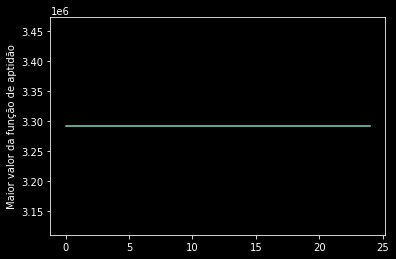

In [20]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Maior valor da função de aptidão')
plt.show()